# 1. Business Understanding

Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.<br>

   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

--------------Type the answers below this line-------------- 

1.The city of New York has 4 districts and within them there are 76 industrial lanes.These lanes has numerous small businesses and shop fronts.These pose a risk for public health safety if they aren't constantly monitored and frequently sanitized.

In order to monitor and safeguard the public health,the city of new york employees public safety officers and sanitisation workers. The number of employees needed to perform these duties varies with lanes and broadly depends on the business activity which changes every year. Though the lane level business activity can be forecasted,the number of employees that are to be recruited at the beginning of the financial year is not available and the recruitment is on adhoc basis.

So We are trying to formulate a analytic solution to predict the number of employees to be recruited at the start of every financial year

2.We need the previous financial year's lane level data showcasing the business activity,level of sanitisation required and corresponding sanitary workers who were employed. 

The data points such as total number of store fronts,store fronts that are occupied,store fronts that are vacant,individual businesses(Retail,offices etc.,),public spaces maintained and service area, provides the overall view of the business activity 

The data points,trash bags collected,trash and recycling receptacles, hours loggedin by the sanitary workers, days per week of sanitisation,public events conducted work gives the overview of the santisation activity done during the previous financial year

The Number of sanitary workers employeed in the last financial year gives the overall employees required to perform the above sanitory activites 

3.We have used the data from the The NYC government site (https://opendata.cityofnewyork.us/).
The API for fetching data from the site is described here: https://data.cityofnewyork.us/City-Government/FY20-BID-Trends-Report-Data/8eq5-dtjb and we have fetched the BID trends data of NYC for year 2020.
We have fetched the data from here: https://data.cityofnewyork.us/resource/8eq5-dtjb.json

4.We have done predictive analytic task by finding out the correlation between the features and traget class, plotted  linear relationshiop, found out Informaion gain, Gini index, Chi square values and trained a decisiontreeclassifier model in ordere to predict the total number of employees that are to be recruited


# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc.
(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website


In [ ]:
##---------Type the code below this line------------------##
import json
import requests

res = requests.get('https://data.cityofnewyork.us/resource/8eq5-dtjb.json')
response = json.loads(res.text)
# We now have the data in the response variable as an array. Let's verify.
print(response[0])

{'bid_name': '125th Street', 'borough': 'MN', 'service_area_linear_feet': '10270', 'full_time_staff': '3', 'sanitation_staff_employed': '6', 'public_safety_staff_employed': '4', 'part_time_staff': '8', 'individual_businesses_retail': '154', 'occupied_storefronts': '180', 'vacant_storefronts': '10', 'total_storefronts': '190', 'bid_provides_supplemental': True, 'type_of_sanitation_services': 'Contracted', 'types_of_duties_assigned': 'Street Sweeping and Bagging; Snow and Ice Removal; Graffiti Removal; Street Furniture Maintenance; Poster and flyer removal', 'days_per_week_of_sanitation': '7', 'hours_logged_by_sanitation': '12740', 'incidents_of_graffiti_removed': '16759', 'trash_bags_collected': '65000', 'trash_and_recycling': '60', 'bid_provides_supplemental_1': True, 'type_of_public_safety_services': 'Contracted', 'duties_assigned_to_public': 'Street patrol; Coordination with NYPD', 'hours_logged_by_public_safety': '10100', 'interactions_with_public': '13000', 'bid_provides_supplement

## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
##---------Type the code below this line------------------##
import pandas as pd

df = pd.DataFrame(response)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:
##---------Type the code below this line------------------##
print("First 5 records")
df.head(5) #displays first five records

First 5 records


,bid_name,borough,service_area_linear_feet,full_time_staff,sanitation_staff_employed,public_safety_staff_employed,part_time_staff,individual_businesses_retail,occupied_storefronts,vacant_storefronts,...,program_service_revenue,contributions,government_grants,streetscape_beautification,supplies_and_equipment_costs,lighting_elements_maintained,planters_and_hanging_baskets,other_infrastructure_elements,miscellaneous_income,capital_improvement_expenses
0,125th Street,MN,10270,3,6,4,8,154,180,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161st Street,BX,5220,1,2,0,3,145,150,2,...,2000,20000,88000,10000,3200,NaN,NaN,NaN,NaN,NaN
2,165th Street Mall,QN,1740,1,3,0,0,168,86,6,...,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN
3,180th Street,QN,8150,1,0,4,0,42,41,1,...,NaN,NaN,NaN,15750,NaN,NaN,NaN,NaN,NaN,NaN
4,34th Street Partnership,MN,41110,54,68,30,10,I don't know,293,56,...,378187,249388,NaN,1930174,9605,698,750,622,38965,132237


In [ ]:
print("Last 5 records")
df.tail(5) #displays last five records

Last 5 records


,bid_name,borough,service_area_linear_feet,full_time_staff,sanitation_staff_employed,public_safety_staff_employed,part_time_staff,individual_businesses_retail,occupied_storefronts,vacant_storefronts,...,program_service_revenue,contributions,government_grants,streetscape_beautification,supplies_and_equipment_costs,lighting_elements_maintained,planters_and_hanging_baskets,other_infrastructure_elements,miscellaneous_income,capital_improvement_expenses
71,Washington Heights BID,MN,7030,2,5,0,0,248,210,38,...,NaN,NaN,35000,NaN,7690,NaN,NaN,NaN,25800,NaN
72,West Shore,SI,26880,1,2,0,3,72,Industrial Space - do not track,Industrical Space - do not track,...,NaN,1000,55000,NaN,NaN,NaN,10,20,NaN,20930
73,Westchester Square,BX,9100,2,2,1,0,190,163,10,...,7369,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
74,White Plains Road,BX,3610,1,2,0,1,106,99,7,...,NaN,NaN,NaN,1000,250,NaN,NaN,NaN,NaN,NaN
75,Woodhaven BID,QN,10340,2,2,NaN,3,348,319,36,...,NaN,5700,NaN,NaN,3923,NaN,16,NaN,NaN,NaN


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [ ]:
##---------Type the code below this line------------------##
df.info() # displays the column headings
print(df.describe()) # displays the statistical information
b = pd.isnull(df)
print(" Null values in data:", b)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   bid_name                        76 non-null     object
 1   borough                         76 non-null     object
 2   service_area_linear_feet        76 non-null     object
 3   full_time_staff                 76 non-null     object
 4   sanitation_staff_employed       76 non-null     object
 5   public_safety_staff_employed    72 non-null     object
 6   part_time_staff                 75 non-null     object
 7   individual_businesses_retail    76 non-null     object
 8   occupied_storefronts            76 non-null     object
 9   vacant_storefronts              76 non-null     object
 10  total_storefronts               76 non-null     object
 11  bid_provides_supplemental       76 non-null     bool  
 12  type_of_sanitation_services     74 non-null     obje

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

--------------Type the answers below this line--------------

1. The dataset contains 76 rows and 68 columns
2. The datset has been published with every attribute as object type i.e. string. Hence we need to change the data types for the columns which contains only numeric data which will be done in Preparation process.
3. Yes from the information and the check for null values we have printed above we could see that almost 50 columns have Null values

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute

In [ ]:
##---------Type the code below this line------------------##
for col in df:
    print(df[col].unique())

['125th Street' '161st Street' '165th Street Mall' '180th Street'
 '34th Street Partnership' '82nd Street Partnership'
 '86th Street Bay Ridge' 'Atlantic Avenue' 'Bay Ridge 5th Avenue'
 'Bayside Village' 'Bed-Stuy Gateway' 'Belmont' 'Brighton Beach'
 'Bryant Park Corporation' 'Chinatown' 'Church Avenue' 'Columbus Avenue'
 'Columbus-Amsterdam' 'Court-Livingston-Schermerhorn'
 'Diamond District Partnership' 'Downtown Alliance'
 'Downtown Flushing Transit Hub' 'Dumbo Improvement District'
 'East Brooklyn' 'East Midtown Partnership' 'FAB Fulton'
 'Fifth Avenue Association' 'Flatbush Avenue' 'Flatbush-Nostrand Junction'
 'Flatiron/23rd Street Partnership' 'Fordham Road' 'Forest Avenue'
 'Fulton Mall Improvement Association' 'Garment District Alliance'
 'GatewayJFK' 'Graham Avenue BID' 'Grand Central Partnership'
 'Grand Street' 'Hudson Square'
 'Hudson Yards Hell�s Kitchen (HYHK) Alliance' 'Jamaica Center'
 'Jerome Gun Hill' 'Kings Highway' 'Kingsbridge' 'Lincoln Square'
 'Long Island City 

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [ ]:
##---------Type the code below this line------------------##
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
#There are no duplicate rows hence no action is taken

number of duplicate rows:  (0, 68)


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [ ]:
##---------Type the code below this line------------------##
print(df.isna().sum())

bid_name                          0
borough                           0
service_area_linear_feet          0
full_time_staff                   0
sanitation_staff_employed         0
                                 ..
lighting_elements_maintained     52
planters_and_hanging_baskets     33
other_infrastructure_elements    33
miscellaneous_income             49
capital_improvement_expenses     68
Length: 68, dtype: int64


## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [ ]:
##---------Type the code below this line------------------##
#Since types_of_duties_assigned and duties_assigned_to_public are of string, 
#have replaced the missing values to Non known using fillna

df["types_of_duties_assigned"].fillna(value='Not known', inplace=True)
df["duties_assigned_to_public"].fillna(value='Not known', inplace=True)
#Rest of all attributes are of numeric values, hence replaced with 0 using fillna i.e. fill null values
df.fillna(value=0, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   bid_name                        76 non-null     object
 1   borough                         76 non-null     object
 2   service_area_linear_feet        76 non-null     object
 3   full_time_staff                 76 non-null     object
 4   sanitation_staff_employed       76 non-null     object
 5   public_safety_staff_employed    76 non-null     object
 6   part_time_staff                 76 non-null     object
 7   individual_businesses_retail    76 non-null     object
 8   occupied_storefronts            76 non-null     object
 9   vacant_storefronts              76 non-null     object
 10  total_storefronts               76 non-null     object
 11  bid_provides_supplemental       76 non-null     bool  
 12  type_of_sanitation_services     76 non-null     obje

,bid_name,borough,service_area_linear_feet,full_time_staff,sanitation_staff_employed,public_safety_staff_employed,part_time_staff,individual_businesses_retail,occupied_storefronts,vacant_storefronts,...,program_service_revenue,contributions,government_grants,streetscape_beautification,supplies_and_equipment_costs,lighting_elements_maintained,planters_and_hanging_baskets,other_infrastructure_elements,miscellaneous_income,capital_improvement_expenses
count,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
unique,76,5,76,18,25,18,11,66,69,51,...,32,33,43,57,65,24,38,41,28,9
top,125th Street,MN,10270,1,2,0,1,154,205,10,...,0,0,0,0,0,0,0,0,0,0
freq,1,25,1,22,20,46,20,2,3,4,...,45,44,33,19,10,52,33,33,49,68


## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [ ]:
##---------Type the code below this line------------------##
#since the below columns do not contribute to the result of predicted column,we can drop the data we don't want to use
df.drop(labels=["type_of_public_safety_services", "type_of_sanitation_services", "communication_channels_used",
                "social_media_followers", "email_distribution_list", "bid_name", "types_of_duties_assigned", 
                "duties_assigned_to_public",
                "supplies_and_equipment_costs", "streetscape_beautification", "government_grants", "contributions",
                "full_time_staff", "part_time_staff",
                "program_service_revenue", "contract_revenue", "hand_sanitizer_distributed",
                "estimated_attendees_to_public", "public_events_coordinated",
                "public_art_installations", "total_expenses", "other_g_a_expenses", "rent_and_utilities",
                "insurance_costs", "outside_contractor_expenses",
                "other_program_expenses", "public_safety_expenses", "marketing_holiday_lighting", "sanitation_expenses",
                "total_support_and_revenue",
                "interest_income", "fundraising_and_special_event", "assessment_revenue", "allocates_staff_salaries",
                "business_grant_or_loan", "gloves_distributed",
                "face_coverings_distributed", "marketing_materials", "miscellaneous_income",
                "capital_improvement_expenses"], axis=1, inplace=True)

print('Final Dataset after Dropping unnecessary Columns:\n')
df.info()
#from the unique values pulled as above, we find that there are string values present in numeric data columns 
#as the dataset represent all attributes as strings even if the column contains only numeric values. 
#by using below function we can find the columns where string values are present

# using Pandas.Series.isin() we have printed the data that is inconsistent with the other values of the columns
print(df.isin(["I don't know", "Do Not Track", "Do not track", "Industrial Space - do not track",
                 "Unknown", "Unkown", "Industrical Space - do not track", "Industrial track", "Less than 1000"]))

Final Dataset after Dropping unnecessary Columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         76 non-null     object
 1   service_area_linear_feet        76 non-null     object
 2   sanitation_staff_employed       76 non-null     object
 3   public_safety_staff_employed    76 non-null     object
 4   individual_businesses_retail    76 non-null     object
 5   occupied_storefronts            76 non-null     object
 6   vacant_storefronts              76 non-null     object
 7   total_storefronts               76 non-null     object
 8   bid_provides_supplemental       76 non-null     bool  
 9   days_per_week_of_sanitation     76 non-null     object
 10  hours_logged_by_sanitation      76 non-null     object
 11  incidents_of_graffiti_removed   76 non-null     object
 12  t

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [ ]:
##---------Type the code below this line------------------##
# to replace below string values in numerical type attributes to 0
df = df.replace({"I don't know": '0', "Do Not Track": '0', "Do not track": '0', 
                 "Industrial Space - do not track": '0',
                 "Unknown": '0', "Unkown": '0',
                 "Industrical Space - do not track": '0', "Industrial track": '0', "Less than 1000": '999'})

# convert below columns to numeric as they have only numeric values

df[["service_area_linear_feet", "sanitation_staff_employed", "public_safety_staff_employed",
    "individual_businesses_retail", "occupied_storefronts",
    "vacant_storefronts", "total_storefronts", "days_per_week_of_sanitation", "hours_logged_by_public_safety",
    "hours_logged_by_sanitation", "incidents_of_graffiti_removed", "trash_bags_collected", "trash_and_recycling",
    "interactions_with_public",
    "banners_maintained", "street_furniture_elements", "salaries", "tree_pits_maintained",
    "wayfinding_elements_maintained", "public_spaces_maintained",
    "lighting_elements_maintained", "planters_and_hanging_baskets", "other_infrastructure_elements"]] = df[
    ["service_area_linear_feet", "sanitation_staff_employed", "public_safety_staff_employed",
     "individual_businesses_retail", "occupied_storefronts",
     "vacant_storefronts", "total_storefronts", "days_per_week_of_sanitation", "hours_logged_by_public_safety",
     "hours_logged_by_sanitation", "incidents_of_graffiti_removed", "trash_bags_collected", "trash_and_recycling",
     "interactions_with_public",
     "banners_maintained", "street_furniture_elements", "salaries", "tree_pits_maintained",
     "wayfinding_elements_maintained", "public_spaces_maintained",
     "lighting_elements_maintained", "planters_and_hanging_baskets", "other_infrastructure_elements"]].astype(float,
                                                                                                              errors='raise')
df["bid_provides_supplemental"] = df["bid_provides_supplemental"].astype(int)
df["bid_provides_supplemental_1"] = df["bid_provides_supplemental_1"].astype(int)
df["bid_provides_supplemental_2"] = df["bid_provides_supplemental_2"].astype(int)
print("after changing the data type")
df.info() #to report the data information after changing

after changing the data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         76 non-null     object 
 1   service_area_linear_feet        76 non-null     float64
 2   sanitation_staff_employed       76 non-null     float64
 3   public_safety_staff_employed    76 non-null     float64
 4   individual_businesses_retail    76 non-null     float64
 5   occupied_storefronts            76 non-null     float64
 6   vacant_storefronts              76 non-null     float64
 7   total_storefronts               76 non-null     float64
 8   bid_provides_supplemental       76 non-null     int64  
 9   days_per_week_of_sanitation     76 non-null     float64
 10  hours_logged_by_sanitation      76 non-null     float64
 11  incidents_of_graffiti_removed   76 non-null     float64
 12  trash_bag

## 3.7 Identify the target variables.<br>


In [ ]:
##---------Type the code below this line------------------##
# Since we will predicting the total number of employees required based on the other features for a certain borough, we have created a new variable Total_employees
# which is sum of columns sanitation_staff_employed and public_safety_staff_employed. This Total employees is the target variable or label which is dependent on
# other columns that act as features. Hence adding "Total employees" as the last column of the data frame
cols = list(df.columns.values)  # Make a list of all of the columns in the df
# cols.pop(cols.index('bid_has_holiday_lighting')) #Remove sanitation_staff_employed from list
cols.pop(cols.index('sanitation_staff_employed'))  # Remove sanitation_staff_employed from list
cols.pop(cols.index('public_safety_staff_employed'))  # Remove public_safety_staff_employed from list
df["Total_employees"] = df['public_safety_staff_employed'] + df['sanitation_staff_employed']
df = df[cols + ['Total_employees']]  # Re-create the dataframe with columns in the order we want
# print(df["Total_employees"].unique())
print("after rearranging")
df.info()

after rearranging
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         76 non-null     object 
 1   service_area_linear_feet        76 non-null     float64
 2   individual_businesses_retail    76 non-null     float64
 3   occupied_storefronts            76 non-null     float64
 4   vacant_storefronts              76 non-null     float64
 5   total_storefronts               76 non-null     float64
 6   bid_provides_supplemental       76 non-null     int64  
 7   days_per_week_of_sanitation     76 non-null     float64
 8   hours_logged_by_sanitation      76 non-null     float64
 9   incidents_of_graffiti_removed   76 non-null     float64
 10  trash_bags_collected            76 non-null     float64
 11  trash_and_recycling             76 non-null     float64
 12  bid_provides_supplem

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [ ]:
##---------Type the code below this line------------------##
df_X = df.iloc[:, 0:26] #independent variables
df_X = df_X.reindex(axis=1)
df_Y = df.iloc[:, -1] # target variable
print("Feature variables contains:", df_X.shape)
print("Target variable contains:", df_Y.shape)

Feature variables contains: (76, 26)
Target variable contains: (76,)


## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.<br>


In [ ]:
##---------Type the code below this line------------------##
# Reformat target column which is continuous to ordinal
# Reformat below columns which are nominal to binary and ordinal(with numeric representation)
df_X["bid_has_holiday_lighting"] = df_X["bid_has_holiday_lighting"].map({"No": 0, "Yes": 1})
df_X["borough"] = df_X["borough"].map({"MN": 0, "BX": 1, "BK": 2, "SI": 3, "QN": 4})
df_Y = pd.cut(df_Y, bins=[0, 10, 60, 110], labels=['0', '1', '2'], include_lowest=True)

print("Unique values of bid_has_holiday_lighting after discretizing", df_X["bid_has_holiday_lighting"].unique())
print("Unique values of borough after discretizing", df_X["borough"].unique())
print("Unique values of target variable", df_Y.unique())                                                       

Unique values of bid_has_holiday_lighting after discretizing [1 0]
Unique values of borough after discretizing [0 1 4 2 3]
Unique values of target variable ['0', '2', '1']
Categories (3, object): ['0' < '1' < '2']


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

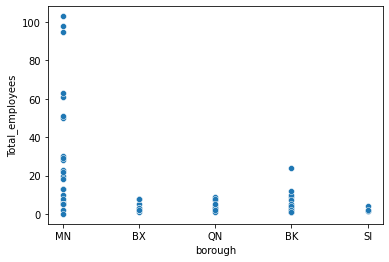

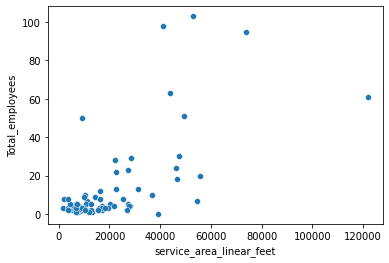

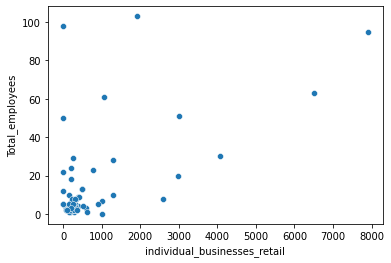

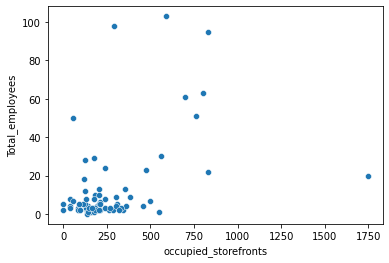

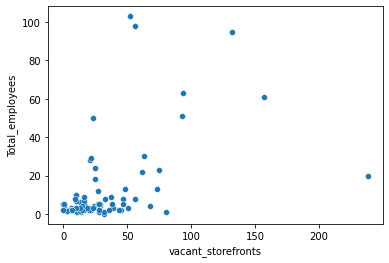

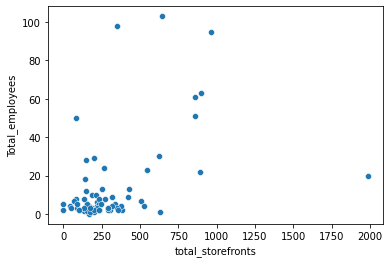

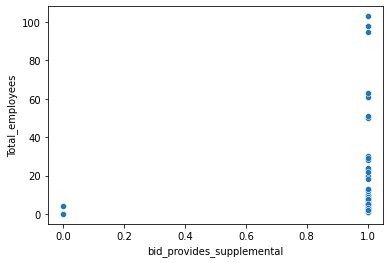

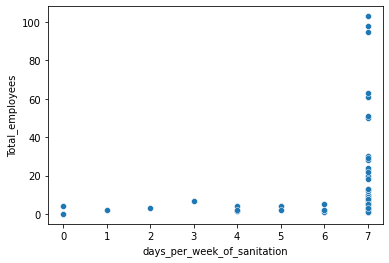

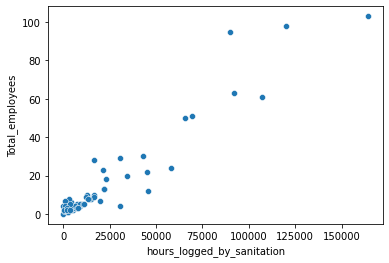

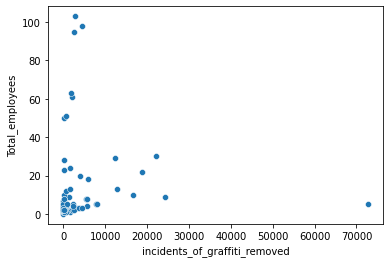

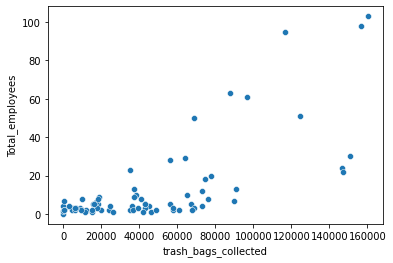

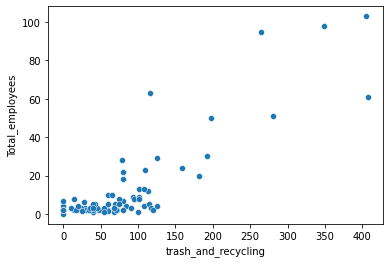

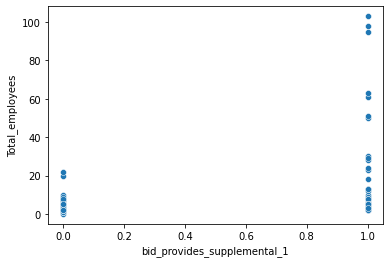

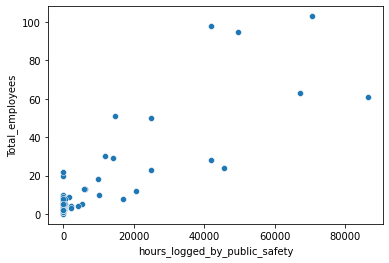

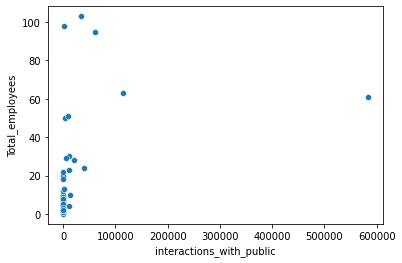

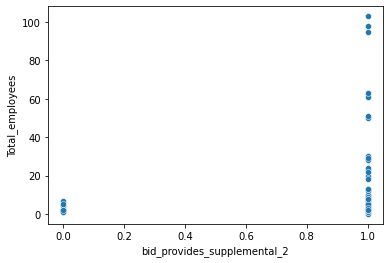

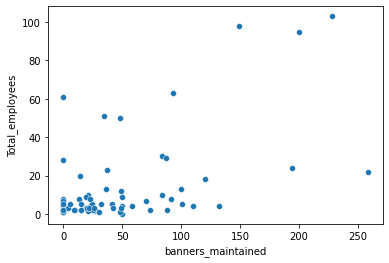

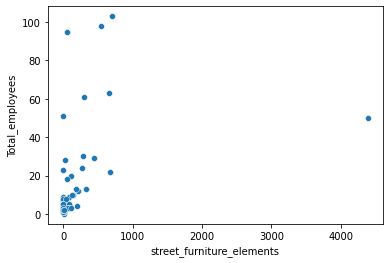

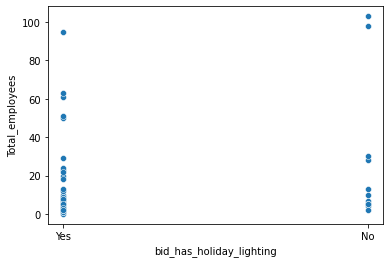

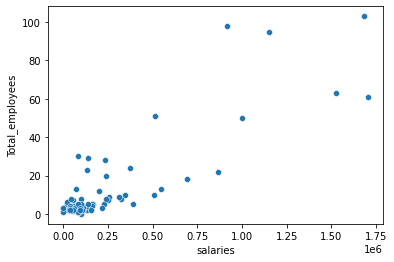

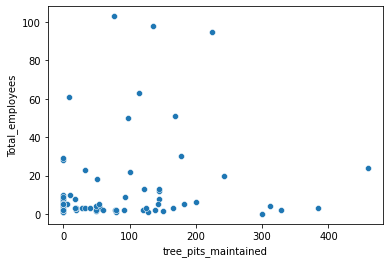

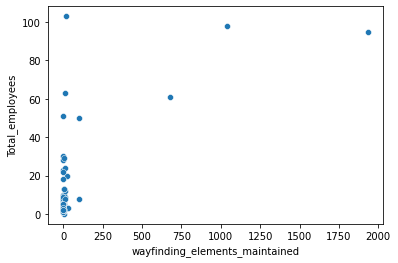

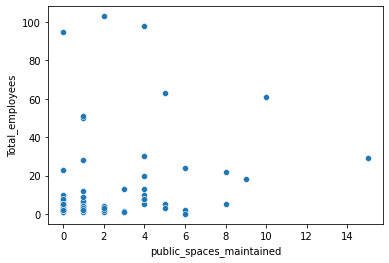

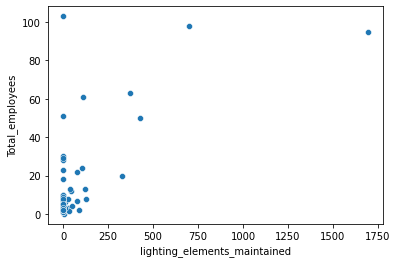

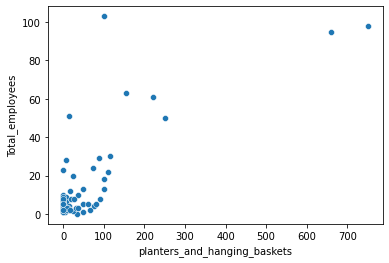

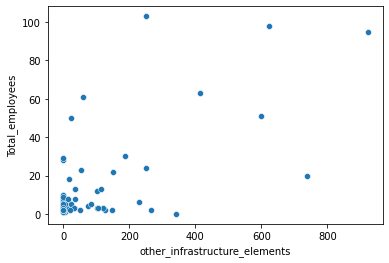

In [ ]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
import seaborn as sns
feature_names = df_X.columns
for i in feature_names:
    sns.scatterplot(x=df[i], y=df["Total_employees"], data=df[feature_names])
    plt.show()
    i = +1

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.<br>


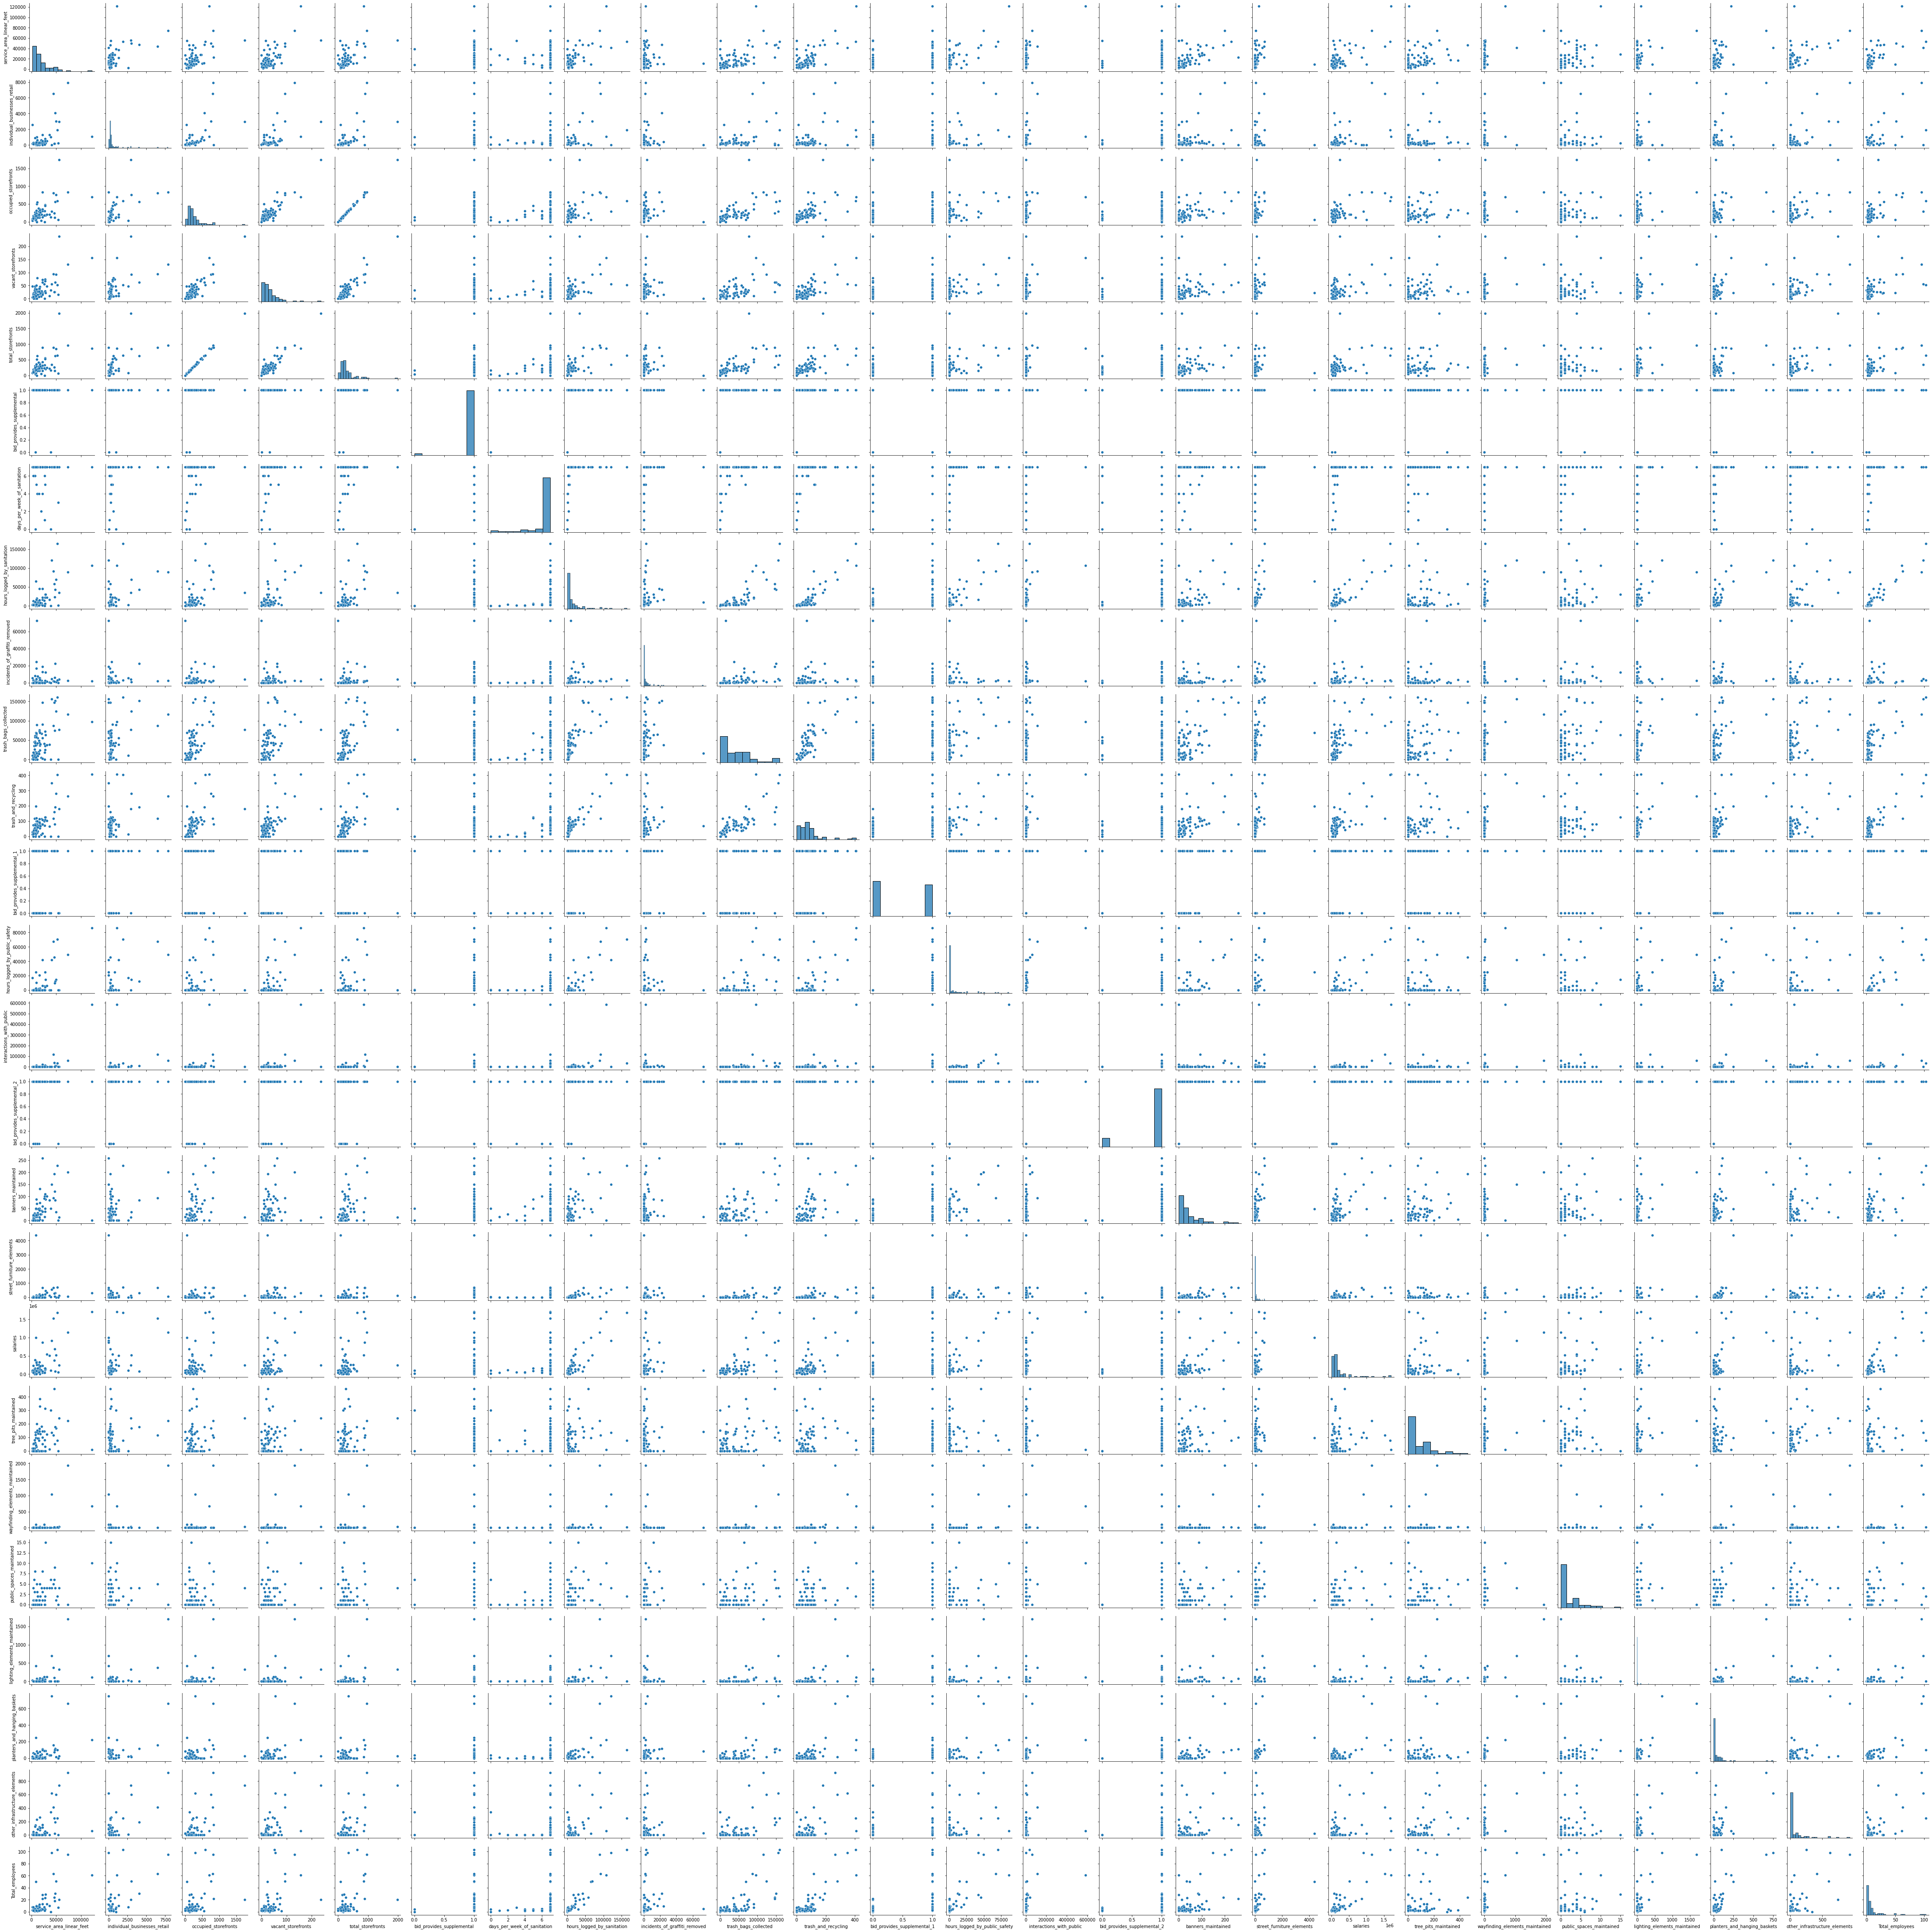

In [ ]:
##---------Type the code below this line------------------##
sns.pairplot(df)
plt.show()

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable.<br>

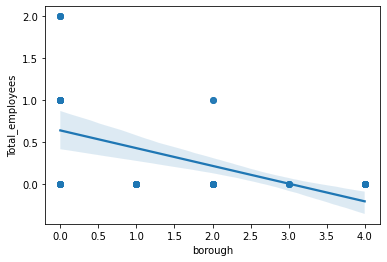

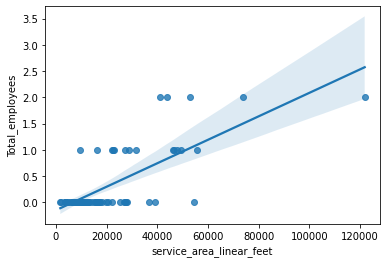

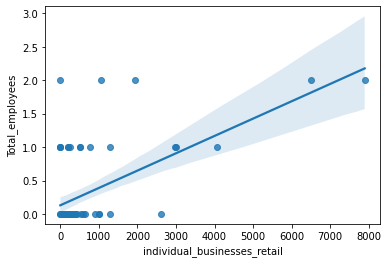

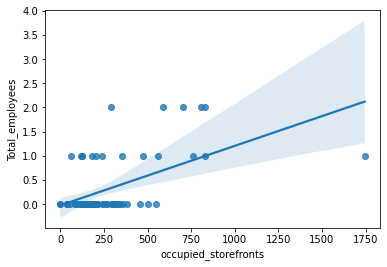

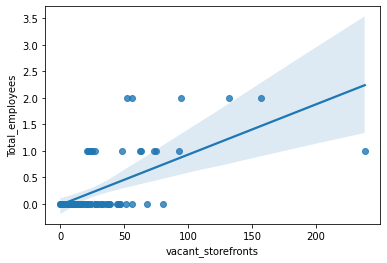

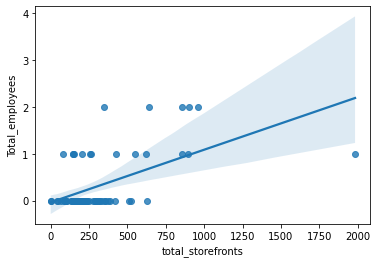

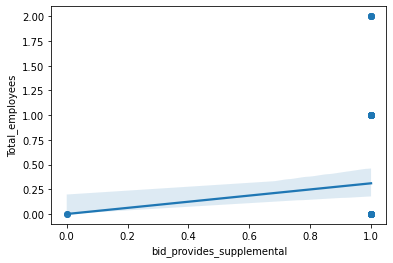

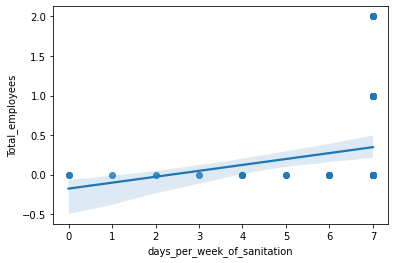

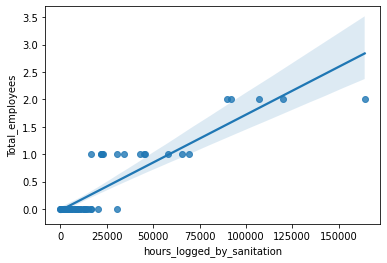

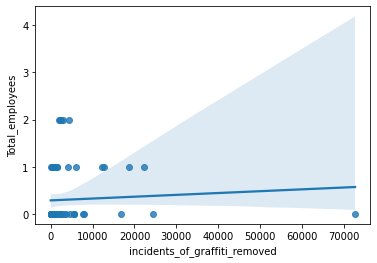

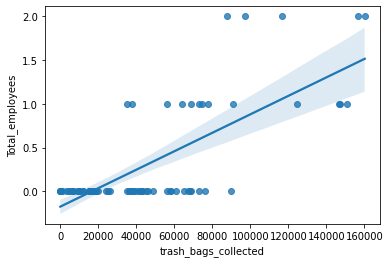

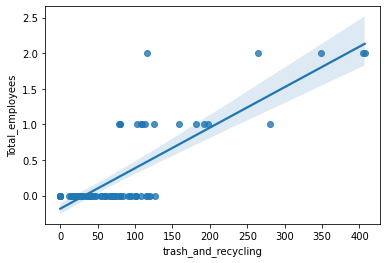

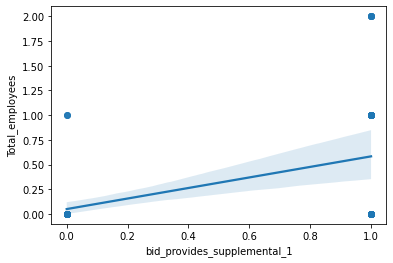

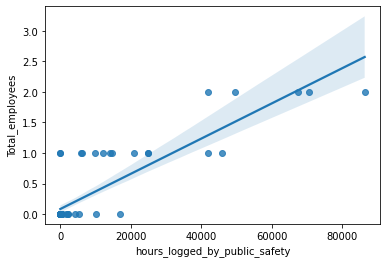

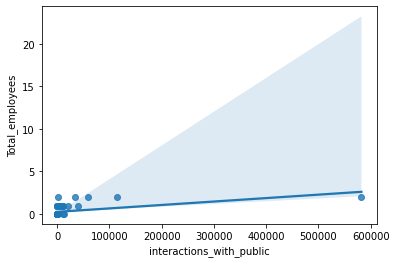

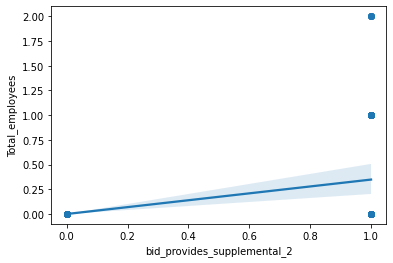

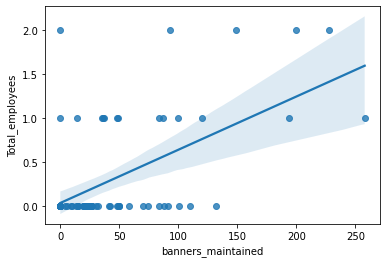

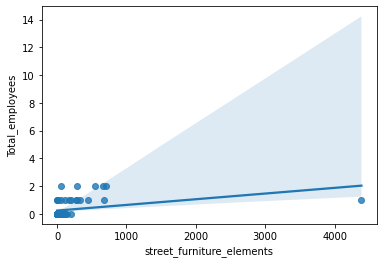

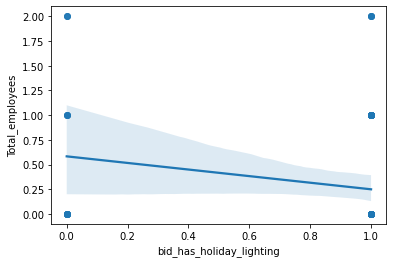

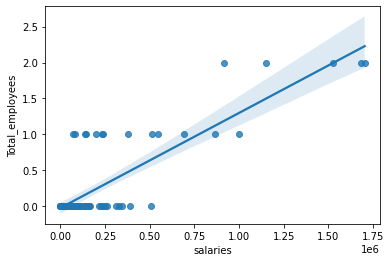

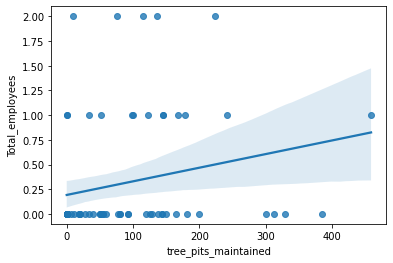

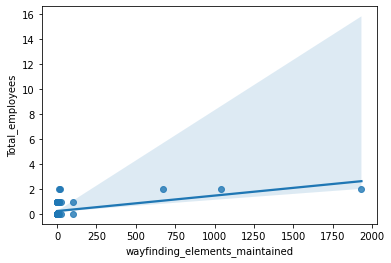

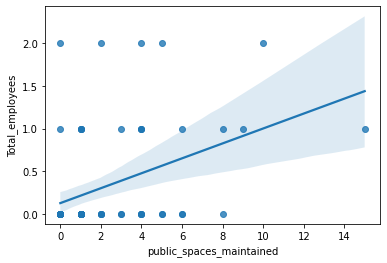

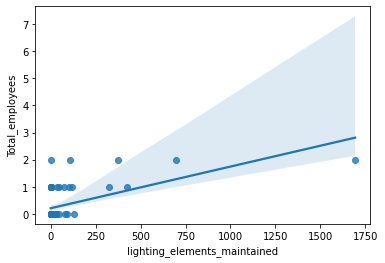

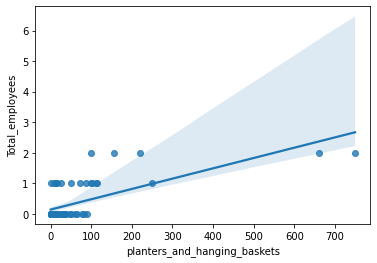

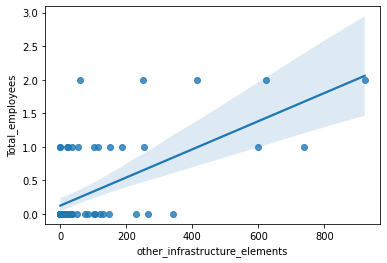

In [ ]:
##---------Type the code below this line------------------##
df_f = df_X.astype(int)
df_t = df_Y.astype(int)
for j in feature_names:
    sns.regplot(x=df_f[j], y=df_t, data=df_f[feature_names])
    plt.show()
    j = +1

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.<br>


In [ ]:
##---------Type the code below this line------------------###
#Since we get to know the linear relation and the behavior of the features with respect to tyarget and as well as
#among the features, we do not needed this

# 5. Data Wrangling<br>
<br>

## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

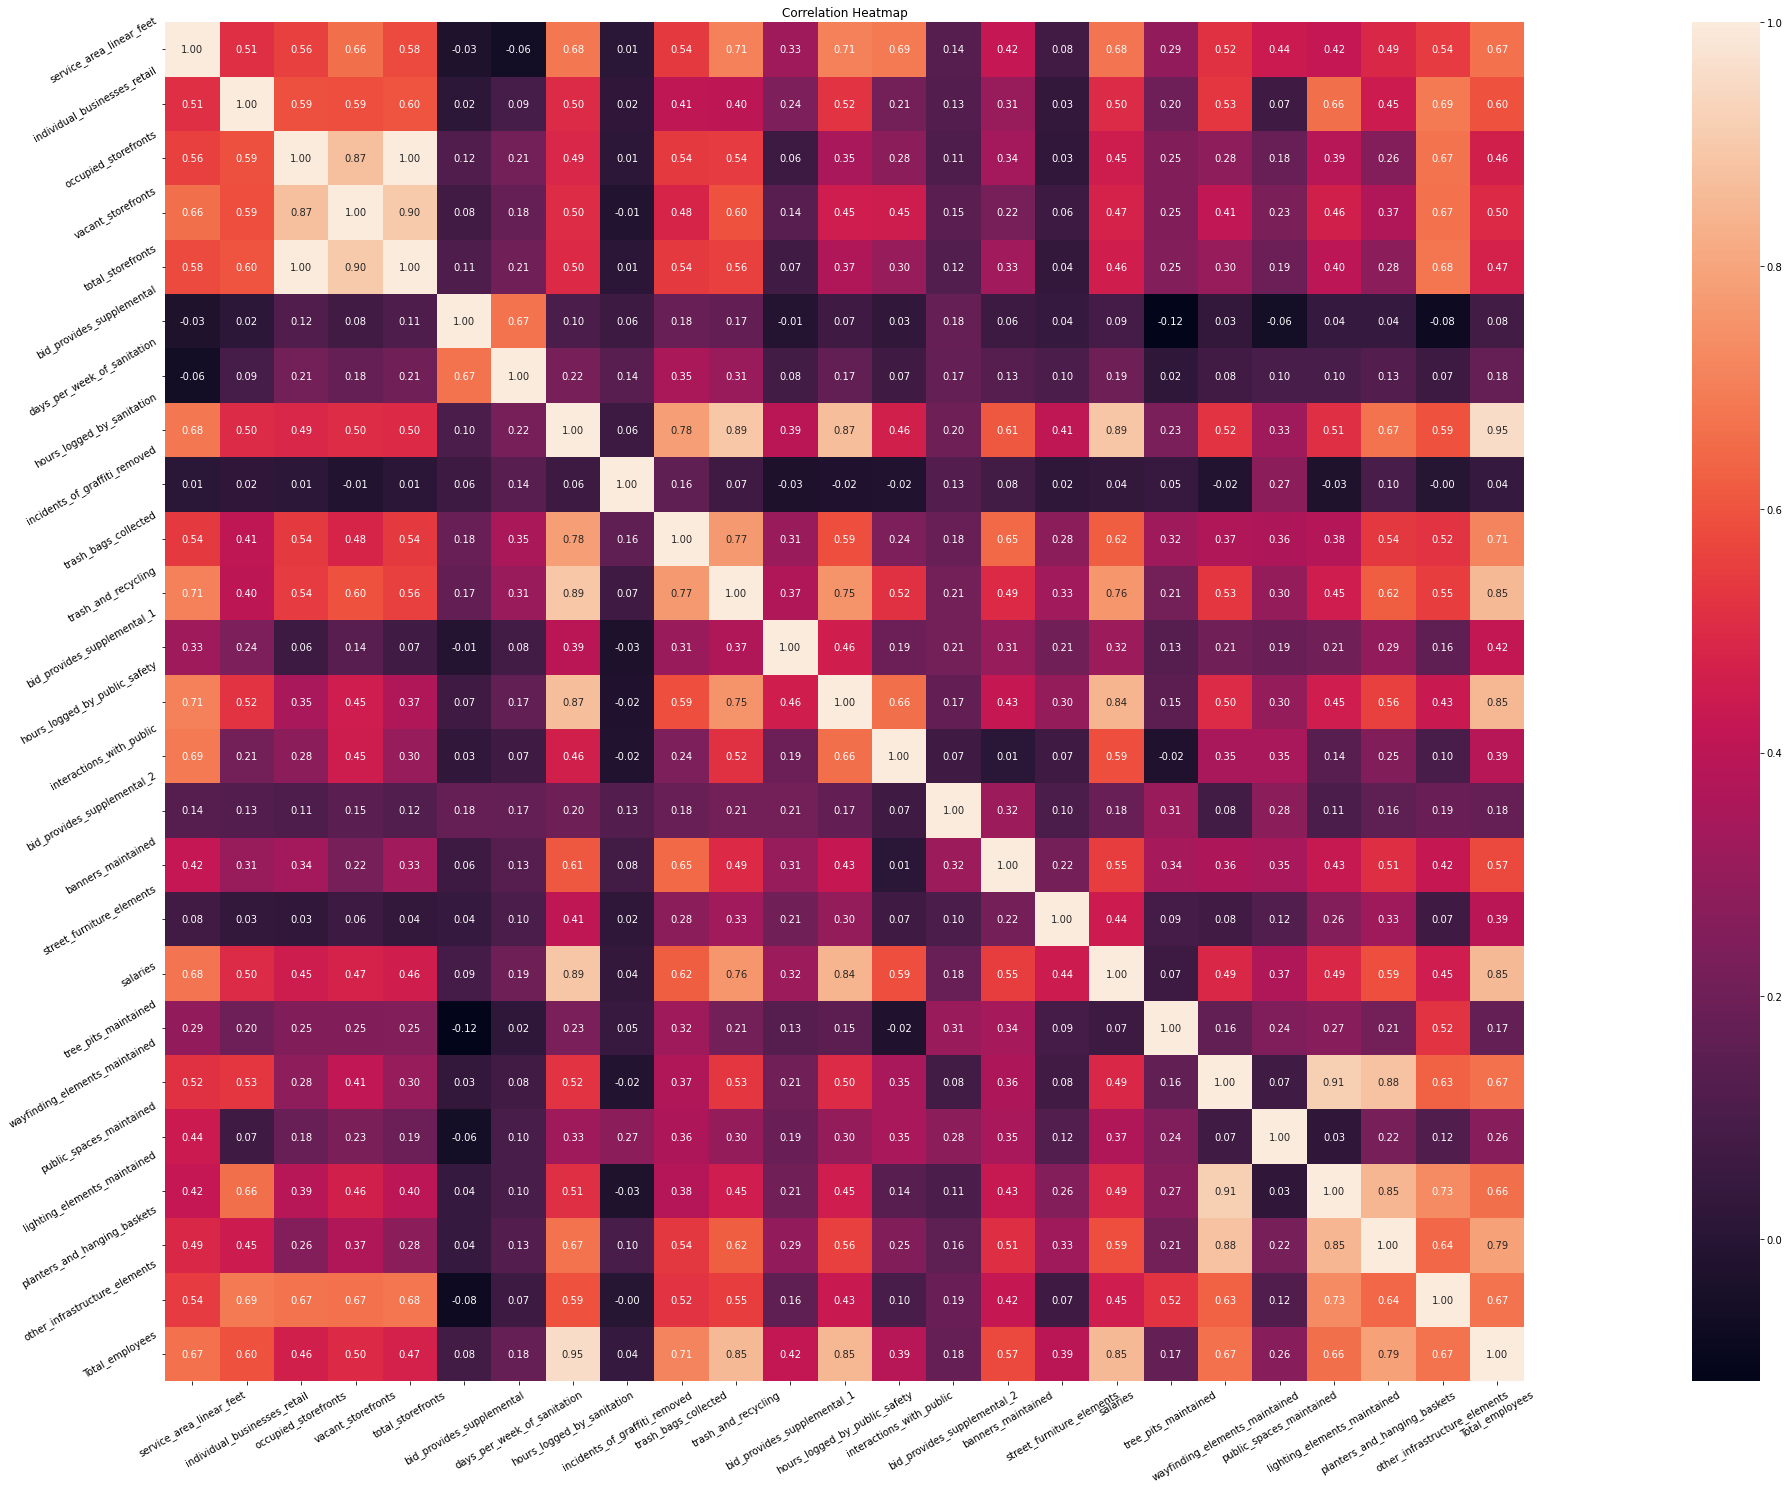

In [ ]:
##---------Type the code below this line------------------##
correlations = df.corr()
# plot the correlation between the columns using a heatmap
plt.figure(figsize=(60, 25))
plt.title('Correlation Heatmap')
a = sns.heatmap(correlations, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
print("Correlation of each attribute with respect to target is:\n")
df.corr().Total_employees.sort_values(ascending=False)

Correlation of each attribute with respect to target is:



Total_employees                   1.000000
hours_logged_by_sanitation        0.952985
trash_and_recycling               0.854137
salaries                          0.852701
hours_logged_by_public_safety     0.847925
planters_and_hanging_baskets      0.786755
trash_bags_collected              0.713373
other_infrastructure_elements     0.668502
wayfinding_elements_maintained    0.666007
service_area_linear_feet          0.665410
lighting_elements_maintained      0.663457
individual_businesses_retail      0.597548
banners_maintained                0.573434
vacant_storefronts                0.496995
total_storefronts                 0.471244
occupied_storefronts              0.459280
bid_provides_supplemental_1       0.416616
street_furniture_elements         0.394983
interactions_with_public          0.387561
public_spaces_maintained          0.263067
bid_provides_supplemental_2       0.178402
days_per_week_of_sanitation       0.177749
tree_pits_maintained              0.172896
bid_provide

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>)
Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

Top five features with high Information Gain:
hours_logged_by_sanitation is 0.596
hours_logged_by_public_safety is 0.402
bid_provides_supplemental is 0.370
bid_provides_supplemental_1 is 0.364
trash_and_recycling is 0.348

Gini Impurity of the Target class is 0.384
Top 5 features with high Gini index :
bid_provides_supplemental  : 0.3815789473684211  
bid_has_holiday_lighting  : 0.3748629385964912  
bid_provides_supplemental_2  : 0.370414673046252  
days_per_week_of_sanitation  : 0.36375212224108655  
bid_provides_supplemental_1  : 0.32412280701754387  

 Top 5 features with high chi-square:
salaries                         3.138099e+07
interactions_with_public         9.523768e+06
hours_logged_by_sanitation       3.225461e+06
hours_logged_by_public_safety    2.522232e+06
trash_bags_collected             1.551973e+06
dtype: float64


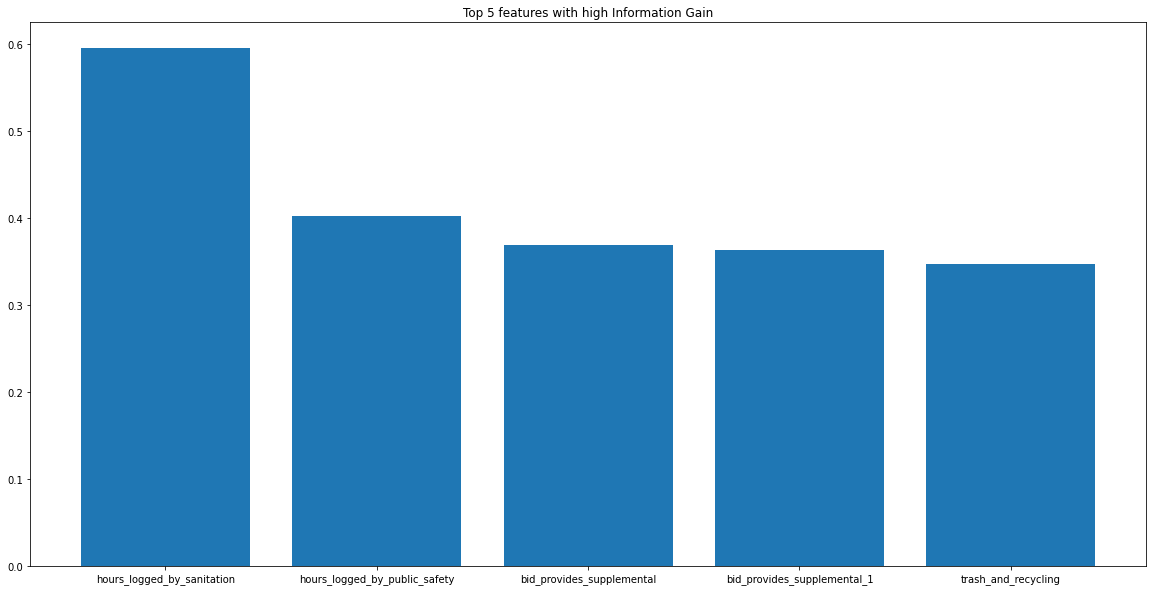

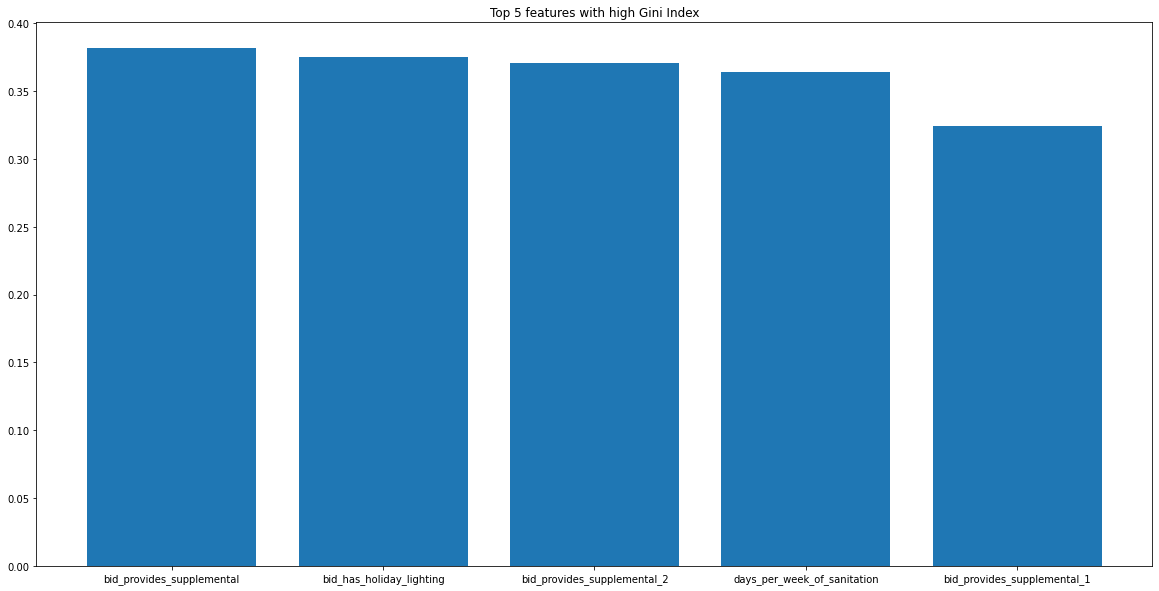

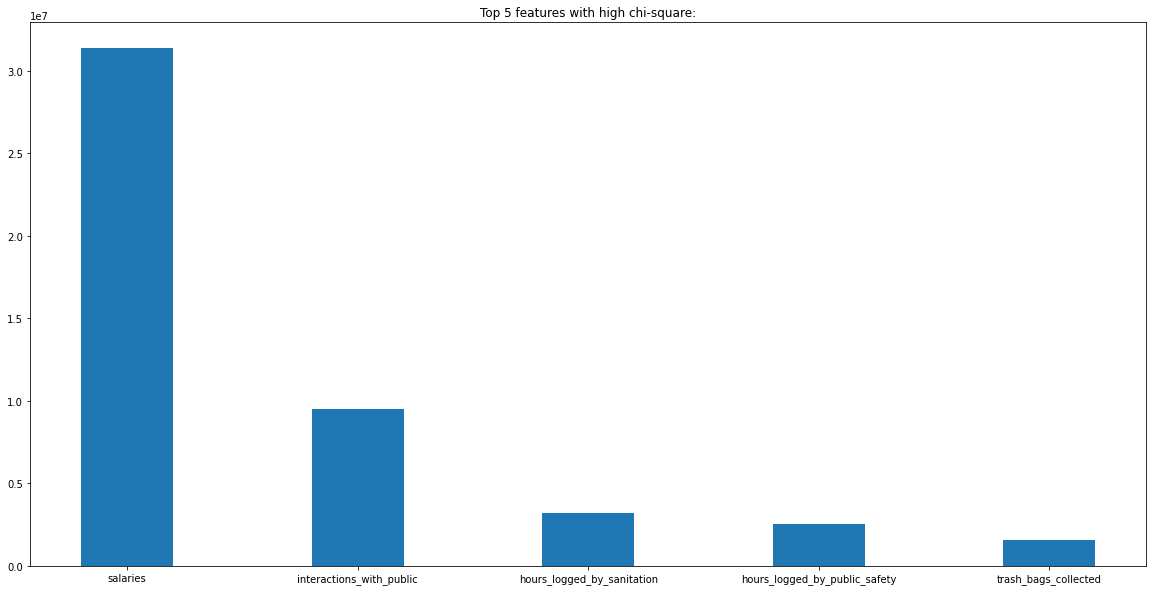

In [ ]:
# Mutual Information
from sklearn.feature_selection import mutual_info_classif

threshold = 5  # the number of most relevant features
high_score_features = []
high_score_values = []
feature_scores = mutual_info_classif(df_X, df_Y, random_state=0)
print("Top five features with high Information Gain:")
for score, f_name in sorted(zip(feature_scores, df_X.columns), reverse=True)[:threshold]:
    print(f'{f_name} is {score:.3f}')
    high_score_features.append(f_name)
    high_score_values.append(score)


# 2. Gini Index
# STEP 1: Calculate gini(target class)

def gini_impurity(value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum + (value_counts[key] / n) * (value_counts[key] / n)
    gini = 1 - p_sum
    return gini

class_value_counts = df_Y.value_counts()
#print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the Target class is {gini_class:.3f}')

# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df_X[attribute_name].value_counts()
    gini_a = 0
    for key in attribute_values.keys():
        df_k = df_Y[df_X[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_a = gini_a + ((n_k / n) * gini_impurity(df_k))
    return gini_a

gini_attribute = {}
for key in df_X.columns:
    gini_attribute[key] = gini_split_a(key)

from collections import Counter
k = Counter(gini_attribute)
# Finding 5 highest values
high = k.most_common(5)
print("Top 5 features with high Gini index :")
for i in high:
    print(i[0], " :", i[1], " ")

# Chi-Squared test
from sklearn.feature_selection import chi2

chi_scores = chi2(df_X, df_Y)
p_values = pd.Series(chi_scores[0],index = feature_names)
p_values.sort_values(ascending = False , inplace = True)
print(f'\n Top 5 features with high chi-square:')
print(p_values.head(5))


# plot the top five features with high information gain
plt.figure(figsize=(20, 10))
plt.title('Top 5 features with high Information Gain')
plt.bar(range(len(high_score_features)), high_score_values, tick_label=high_score_features)
plt.show()

# plot the top five features with high Gini index
plt.figure(figsize=(20, 10))
plt.title('Top 5 features with high Gini Index')
names, values = map(list, zip(*high))
plt.bar(range(len(high)), values, tick_label=names)
plt.show()

#Plot the top five features with high chi-square value
plt.figure(figsize=(20, 10))
plt.title("Top 5 features with high chi-square:")
t = pd.Series(p_values, index=df_X.columns).nlargest(5)
plt.bar(list(t.index), list(t.values), width = 0.4)
plt.show()


## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

Top 5 features of decision classifier:  hours_logged_by_sanitation        0.869393
hours_logged_by_public_safety     0.067349
wayfinding_elements_maintained    0.034265
tree_pits_maintained              0.028994
borough                           0.000000
dtype: float64


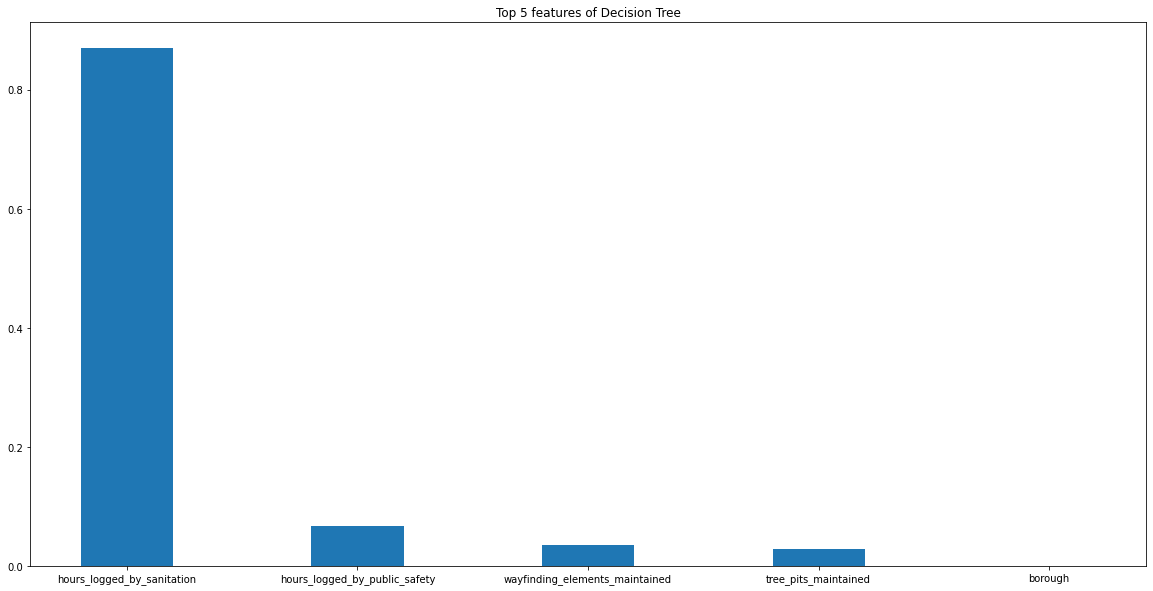

In [ ]:
##---------Type the code below this line------------------##
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifer object

model = DecisionTreeClassifier()
# fit the model
model.fit(df_X, df_Y)
# get importance
importance = model.feature_importances_
clf = pd.Series(model.feature_importances_, index=df_X.columns).nlargest(5)
print("Top 5 features of decision classifier: ", clf)
fea = list(clf.index)
val = list(clf.values)
# plot five important features
plt.figure(figsize=(20, 10))
plt.title('Top 5 features of Decision Tree')
plt.bar(fea, val, width = 0.4)
plt.show()

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
##---------Type the code below this line------------------##
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs = sfs(model,
          k_features=5,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs1 = sfs.fit(df_X, df_Y, custom_feature_names=feature_names)
print("Top 5 features")
print(sfs1.k_feature_names_)

Top 5 features
('borough', 'service_area_linear_feet', 'individual_businesses_retail', 'occupied_storefronts', 'hours_logged_by_sanitation')


## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

1.From the correlation heatmap, we could see that features hours_logged_by_sanitation, trash_and_recycling              
salaries, hours_logged_by_public_safety and planters_and_hanging_baskets are the top 5 features with 
correlation near to 1 with respect to target class

2.From Information Gain, we have got hours_logged_by_sanitation, hours_logged_by_public_safety,
bid_provides_supplemental, bid_provides_supplemental_1 and trash_and_recycling as top 5 features

3.From Gini Index, the top 5 features are bid_provides_supplemental, bid_has_holiday_lighting,
bid_provides_supplemental_2, days_per_week_of_sanitation, bid_provides_supplemental_1  

4.We have got salaries, interactions_with_public, hours_logged_by_sanitation, hours_logged_by_public_safety   
and trash_bags_collected with high chi-square values

5.From DecisiontreeClassifier model, we have got hours_logged_by_sanitation, hours_logged_by_public_safety,        
wayfinding_elements_maintained, tree_pits_maintained  and borough as top 5 features

6.From Mlxtend function we have got borough, service_area_linear_feet, individual_businesses_retail,
occupied_storefronts, and hours_logged_by_sanitation as top 5 features

The top 3 significant features are hours_logged_by_sanitation, hours_logged_by_public_safety and 
bid_provides_supplemental_1 since the occurence of these features as one of top 5 features in above methods are more 
when compared to others.
